In [1]:
import numpy as np

In [2]:
import models as m
import plot_graphs as plot
import conditional_independence as cond_indep

In [3]:
from itertools import combinations

In [4]:
X, current_model = m.load_model(1)

In [5]:
print(current_model)

[[0 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]


In [6]:
print(X)

[[ 0.63846157  0.79254625  0.06456664 -0.06252876]
 [-1.44024315  1.81238138  0.5991941   1.78549287]
 [-0.7205771   0.66541959 -0.28351888 -1.96095674]
 ...
 [-1.02241965 -0.96876503  0.55172409 -0.09725507]
 [-0.44352933 -1.90038046 -1.27169201 -2.25987822]
 [ 1.19683064  0.54566874  0.02520881  0.13909247]]


/Users/Oana/python_virtual_envs/kausale_inferenz_virtualenv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


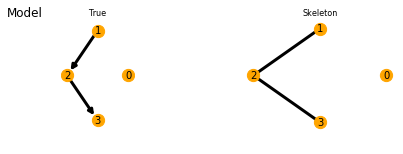

In [7]:
plot.plot_graphs(current_model, current_model)

In [8]:
# Form complete graph
n = X.shape[1]
graph = np.ones((n ,n), dtype='int')
graph[range(n),range(n)] = 0

# Define adj
adjacency = m.get_adj(graph)

print(adjacency)
print(n)

l = 0
C = current_model

sig_level = 0.1

sepset = dict()

while max([len(value) for key, value in adjacency.items()]) >= l:
    for i in range(n):
        for j in range(i+1, n):
            conditions = list(combinations([l for l in range(n) if l != i and l != j], l))
        for S in conditions:
            if len(S) > 0: z = X[:,S]
            else: z = None
            nonsig = cond_indep.test(x=X[:,i], y=X[:,j], z=z)[0]
            if nonsig > sig_level:
                graph[i,j] = graph[j,i] = 0
                sepset.update({(i, j):S})
                break
            
        l += 1


{0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
4


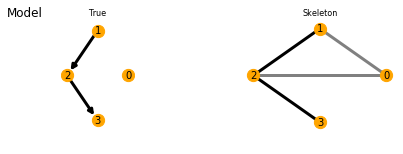

In [9]:
plot.plot_graphs(current_model, graph)